In [65]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Each row contains data from each card from each deck used in each official tournaments from 2011-2023.**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


import warnings
warnings.filterwarnings('ignore')

I Have Imported some basic math and learning functionality to help tighten our analysis of a large varied data set of competitive gaming data 

In [67]:
df = pd.read_csv('tournaments.csv')



<span style="font-family:Gill Sans; font-size:2em;">This reads a tournament registration for the card game pokemon: A physical pokemon card has certain aspects to it that allows it to compete in a standardized ruleset </span>

In [68]:
# Check first 5 lines

df.head()

,id_card,name_card,amount_card,price_card,energy_type_card,type_card,combo_type_id,combo_type_name,id_player,name_player,...,region_tournament,country_tournament,year_tournament,month_tournament,day_tournament,valid_rotation_at_tournament,rotation_name,year_begin,month_begin,day_begin
0,SSP272,Archeops,4,0.70,Colorless,Pokémon,247.0,Lugia Archeops,5101,Alexander Flatos,...,NaN,United States,2023,10,14,BST-OBF,standard_2023,2023,4,14
1,SIT138,Lugia V,3,6.20,Colorless,Pokémon,247.0,Lugia Archeops,5101,Alexander Flatos,...,NaN,United States,2023,10,14,BST-OBF,standard_2023,2023,4,14
2,SIT139,Lugia VSTAR,3,8.71,Colorless,Pokémon,247.0,Lugia Archeops,5101,Alexander Flatos,...,NaN,United States,2023,10,14,BST-OBF,standard_2023,2023,4,14
3,LOR143,Snorlax,3,0.93,Colorless,Pokémon,247.0,Lugia Archeops,5101,Alexander Flatos,...,NaN,United States,2023,10,14,BST-OBF,standard_2023,2023,4,14
4,SSP250,Lumineon V,2,1.90,Water,Pokémon,247.0,Lugia Archeops,5101,Alexander Flatos,...,NaN,United States,2023,10,14,BST-OBF,standard_2023,2023,4,14


<span style="font-family:Gill Sans; font-size:2em;"> Looking at how the tables are formatted, intitial insights are that a lot of proffesional players run multiple decks  of the same format a lot</span>

In [69]:
# Check last 5 lines

df.tail()

,id_card,name_card,amount_card,price_card,energy_type_card,type_card,combo_type_id,combo_type_name,id_player,name_player,...,region_tournament,country_tournament,year_tournament,month_tournament,day_tournament,valid_rotation_at_tournament,rotation_name,year_begin,month_begin,day_begin
114286,GRI130a,Rescue Stretcher,2,0.72,NaN,Trainer,47.0,Zoroark Greninja,1900,Jin Woo Lee,...,AS-OC,Korea,2018,12,22,NaN,standard_2019,2018,8,28
114287,GRI119,Aqua Patch,2,0.27,NaN,Trainer,47.0,Zoroark Greninja,1900,Jin Woo Lee,...,AS-OC,Korea,2018,12,22,NaN,standard_2019,2018,8,28
114288,FLF092,Pal Pad,1,0.68,NaN,Trainer,47.0,Zoroark Greninja,1900,Jin Woo Lee,...,AS-OC,Korea,2018,12,22,NaN,standard_2019,2018,8,28
114289,GRI121,Choice Band,2,0.20,NaN,Trainer,47.0,Zoroark Greninja,1900,Jin Woo Lee,...,AS-OC,Korea,2018,12,22,NaN,standard_2019,2018,8,28
114290,GRI120,Brooklet Hill,2,0.32,NaN,Trainer,47.0,Zoroark Greninja,1900,Jin Woo Lee,...,AS-OC,Korea,2018,12,22,NaN,standard_2019,2018,8,28


In [70]:
# Check Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114291 entries, 0 to 114290
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_card                       114291 non-null  object 
 1   name_card                     114291 non-null  object 
 2   amount_card                   114291 non-null  int64  
 3   price_card                    110601 non-null  float64
 4   energy_type_card              42447 non-null   object 
 5   type_card                     114291 non-null  object 
 6   combo_type_id                 114244 non-null  float64
 7   combo_type_name               114244 non-null  object 
 8   id_player                     114291 non-null  int64  
 9   name_player                   114291 non-null  object 
 10  country_player                114291 non-null  object 
 11  all_time_score                114291 non-null  int64  
 12  ranking_player_tournament     114291 non-nul

In [71]:
# Numerical features

df.describe(exclude=['O'])

,amount_card,price_card,combo_type_id,id_player,all_time_score,ranking_player_tournament,id_tournament,year_tournament,month_tournament,day_tournament,year_begin,month_begin,day_begin
count,114291.000000,110601.000000,114244.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000,114291.000000
mean,2.150869,1.996521,193.066297,2432.756341,100.721177,47.290469,300.991942,2021.575461,6.172507,13.954047,2020.830573,6.883289,12.963444
std,1.172458,5.537550,75.891478,1689.635106,158.626738,42.015853,89.110764,2.330584,3.194120,8.229426,2.449667,2.332956,6.361826
min,1.000000,0.020000,1.000000,1.000000,1.000000,1.000000,4.000000,2011.000000,1.000000,1.000000,2010.000000,4.000000,1.000000
25%,1.000000,0.170000,167.000000,712.000000,12.000000,13.000000,289.000000,2020.000000,4.000000,7.000000,2020.000000,4.000000,10.000000
50%,2.000000,0.640000,227.000000,2435.000000,34.000000,35.000000,329.000000,2023.000000,6.000000,14.000000,2021.000000,8.000000,14.000000
75%,3.000000,2.160000,247.000000,4055.000000,108.000000,70.000000,359.000000,2023.000000,9.000000,21.000000,2023.000000,9.000000,14.000000
max,4.000000,246.620000,265.000000,5162.000000,943.000000,193.000000,410.000000,2023.000000,12.000000,30.000000,2023.000000,9.000000,28.000000


In [72]:
# Categorical features

df.describe(include=['O'])

,id_card,name_card,energy_type_card,type_card,combo_type_name,name_player,country_player,category_tournament,name_tournament,region_tournament,country_tournament,valid_rotation_at_tournament,rotation_name
count,114291,114291,42447,114291,114244,114291,114291,114291,114291,58412,114291,98686,114291
unique,1707,1323,22,2,376,2653,47,5,119,4,26,21,13
top,DEX102,Ultra Ball,Psychic,Trainer,Lugia Archeops,Tord Reklev,United States,regional,NAIC 2023 Columbus,EU,United States,SSH-SIT,standard_2023
freq,3698,3698,8673,71844,17646,607,50127,52978,4391,23165,53947,30998,44610


In [73]:
# Check row and column numbers

rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 114291
Columns: 26


<span style="font-family:Gill Sans; font-size:2em;">Over 100000! entires with a lot of categories to them for a lot of messy analysis </span>

In [74]:
# Check duplicate data

print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 84


In [75]:
# Number of unique values per column.

df.nunique()

id_card                         1707
name_card                       1323
amount_card                        4
price_card                       558
energy_type_card                  22
type_card                          2
combo_type_id                    189
combo_type_name                  376
id_player                       2656
name_player                     2653
country_player                    47
all_time_score                   228
ranking_player_tournament        193
id_tournament                    133
category_tournament                5
name_tournament                  119
region_tournament                  4
country_tournament                26
year_tournament                   13
month_tournament                  12
day_tournament                    29
valid_rotation_at_tournament      21
rotation_name                     13
year_begin                        13
month_begin                        3
day_begin                          6
dtype: int64

In [76]:
# Check the unique values for 'year_tournament' column.

df['year_tournament'].unique()

array([2023, 2022, 2018, 2016, 2015, 2014, 2013, 2020, 2019, 2017, 2012,
       2011, 2021])

In [77]:
# Check the unique values and frequency for 'year_tournament' column

df['year_tournament'].value_counts()

year_tournament
2023    70158
2022    14660
2019    11446
2018     6718
2020     2766
2017     2641
2016     1941
2015     1606
2014      960
2021      607
2013      498
2011      175
2012      115
Name: count, dtype: int64

In [78]:
# minimum (min) and maximum (max) value of 'year_tournament' column.

print(df['year_tournament'].min())
print(df['year_tournament'].max())

2011
2023


In [79]:
# Print data from a specific line (row = 100)

print("Value of row 100")
display(df.iloc[100])

Value of row 100


id_card                                         NXD089
name_card                                   Level Ball
amount_card                                          4
price_card                                        0.99
energy_type_card                                   NaN
type_card                                      Trainer
combo_type_id                                    255.0
combo_type_name                              Gardevoir
id_player                                          765
name_player                                Ryan Harris
country_player                           United States
all_time_score                                      86
ranking_player_tournament                            5
id_tournament                                      387
category_tournament                           regional
name_tournament                 Regional Sacramento CA
region_tournament                                  NaN
country_tournament                       United States
year_tourn

<span style="font-family:Gill Sans; font-size:2em;">Wanted to see what it would look like to pull a card entry (100)  </span>

In [80]:
# Locate specific data in the column "price_card = 2.73"

print(df[df['price_card'] == 2.73])


       id_card          name_card  amount_card  price_card energy_type_card  \
104299  SSP123  Galarian Articuno            1        2.73          Psychic   

       type_card  combo_type_id combo_type_name  id_player   name_player  ...  \
104299   Pokémon          255.0       Gardevoir       4107  Kohei Otsuki  ...   

       region_tournament  country_tournament  year_tournament  \
104299                JP               Japan             2023   

        month_tournament day_tournament valid_rotation_at_tournament  \
104299                 2             25                          NaN   

        rotation_name year_begin  month_begin  day_begin  
104299  standard_2022       2021            9         10  

[1 rows x 26 columns]


<span style="font-family:Gill Sans; font-size:2em;"> You can even look for cards with specific prices if you want to build a budget deck that sees regular tournament play</span>

In [81]:
## We select the categorical and numeric variables to plot.

# Categorical variables:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()

# Numerical variables:
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

<span style="font-family:Gill Sans; font-size:2em;"> Seperate numerical and categorical data in order to get a focused lens to how to treat them</span>

In [82]:
df.to_csv('cleaned_pokemon_tournament_data.csv', index=False)
print(f"\nCleaned data saved to 'cleaned_pokemon_tournament_data.csv'")


Cleaned data saved to 'cleaned_pokemon_tournament_data.csv'


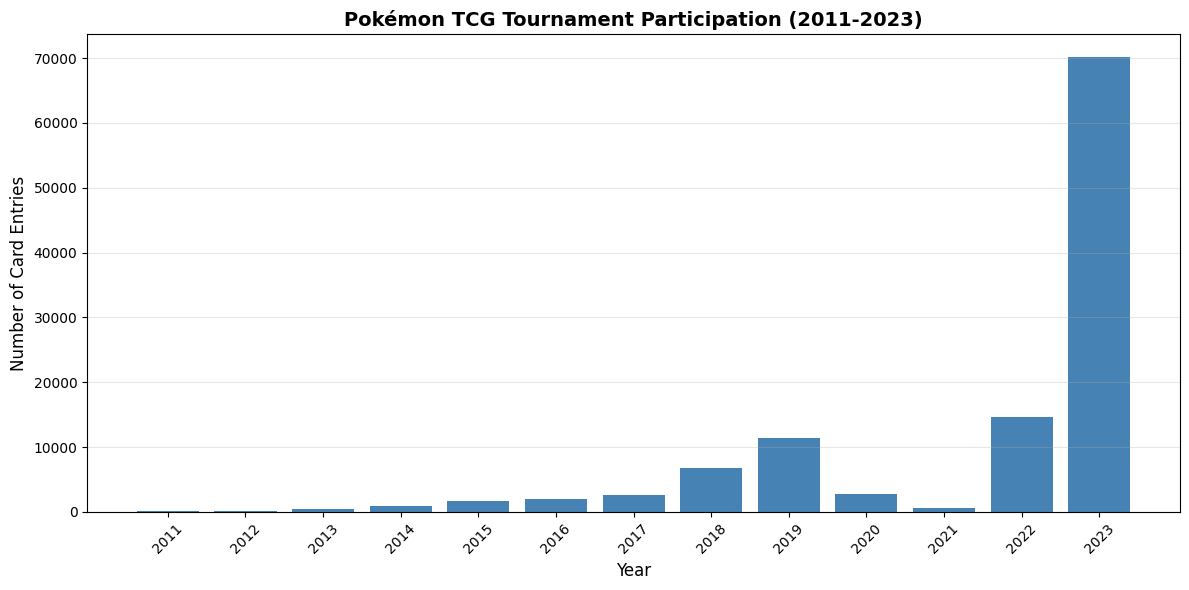

In [83]:
year_counts = df['year_tournament'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(year_counts.index, year_counts.values, color='steelblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Card Entries', fontsize=12)
plt.title('Pokémon TCG Tournament Participation (2011-2023)', fontsize=14, fontweight='bold')
plt.xticks(year_counts.index, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

<span style="font-family:Gill Sans; font-size:2em;"> The Figure above shows the number of cards entered into tournaments over the years 2011-2023. Just from an initial look its obvious to see that 2023 has experienced an extremely unique growth in the number of cards entered into a tournament!</span>


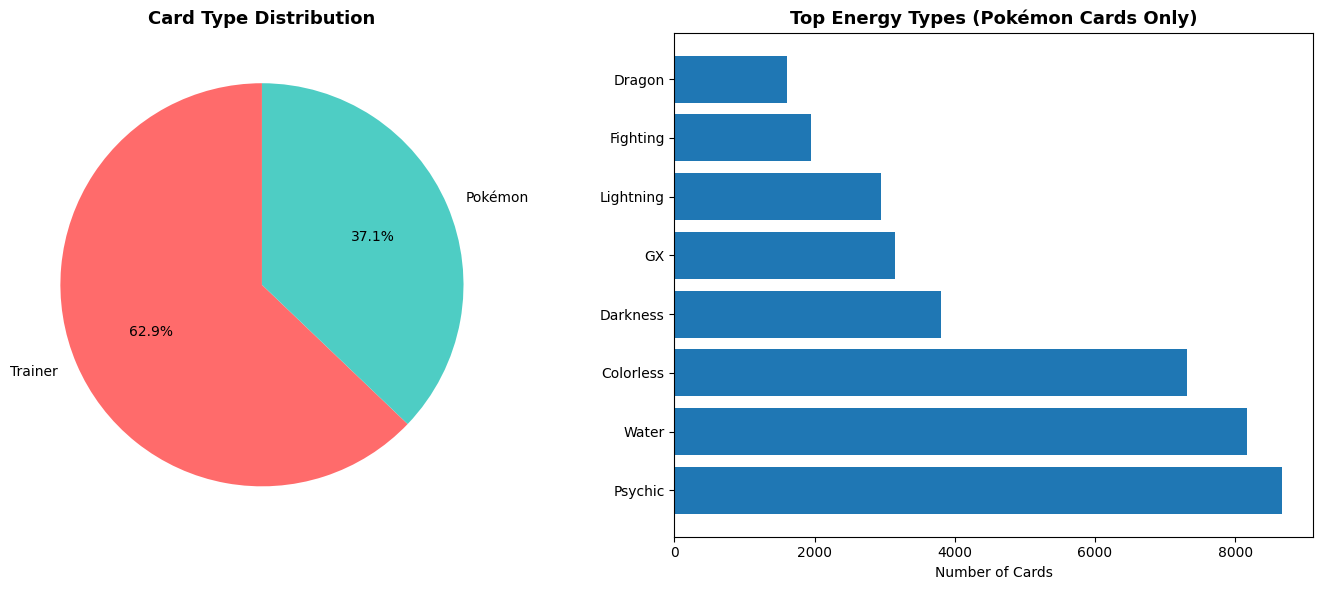

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Card type distribution
type_counts = df['type_card'].value_counts()
ax1.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
ax1.set_title('Card Type Distribution', fontsize=13, fontweight='bold')

# Energy type distribution (Pokémon only)
energy_counts = df['energy_type_card'].dropna().value_counts().head(8)
ax2.barh(range(len(energy_counts)), energy_counts.values)
ax2.set_yticks(range(len(energy_counts)))
ax2.set_yticklabels(energy_counts.index)
ax2.set_xlabel('Number of Cards')
ax2.set_title('Top Energy Types (Pokémon Cards Only)', fontsize=13, fontweight='bold')
plt.tight_layout()


<span style="font-family:Gill Sans; font-size:2em;">

Above is a figure that contains a pie chart that seperates the two main categories of cards: pokemon and trainer and then different color/energy assigments to cards

Pokemon cards will have seperations between the mascot monster characters vs item or situation cards that are mostly used as support. 



Pokemon cards also have a type/color attribute to them and decks are mainly built around consistency in types.
</span>

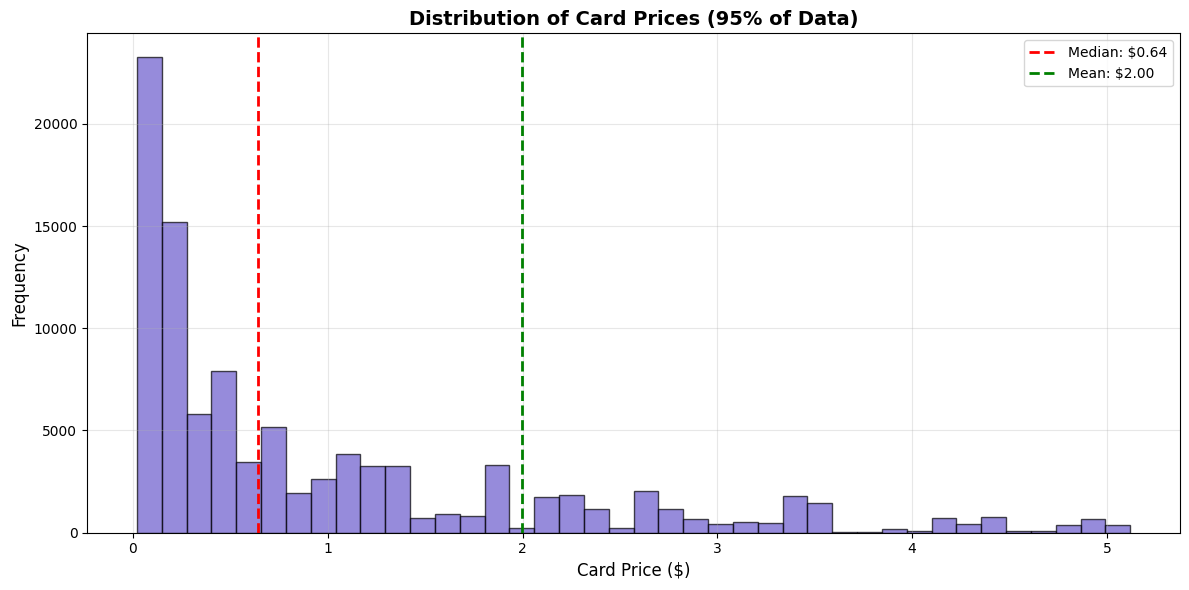

In [85]:
# Code for price analysis visualization
plt.figure(figsize=(12,6))
price_data = df['price_card'].dropna()

# Remove extreme outliers for better visualization
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1
filtered_prices = price_data[(price_data >= Q1 - 1.5*IQR) & (price_data <= Q3 + 1.5*IQR)]

plt.hist(filtered_prices, bins=40, edgecolor='black', alpha=0.7, color='#6A5ACD')
plt.axvline(price_data.median(), color='red', linestyle='--', linewidth=2, 
           label=f'Median: ${price_data.median():.2f}')
plt.axvline(price_data.mean(), color='green', linestyle='--', linewidth=2,
           label=f'Mean: ${price_data.mean():.2f}')
plt.xlabel('Card Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Card Prices (95% of Data)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()


<span style="font-family:Gill Sans; font-size:2em;"> The figure above shows the price distribution of 95% of the data as only a few users have cards with outlier values. Most players that make money off this hobby tend to use cards that are within budget (often less than 50 cents to buy the card direct) </span>

<span style="font-family:Gill Sans; font-size:2em;">Below are all the visuals for the numerical data for the stakeholder report. Not all of them are relevant for analysis as there are many numberical categories that are for tournament registration purposes </span>

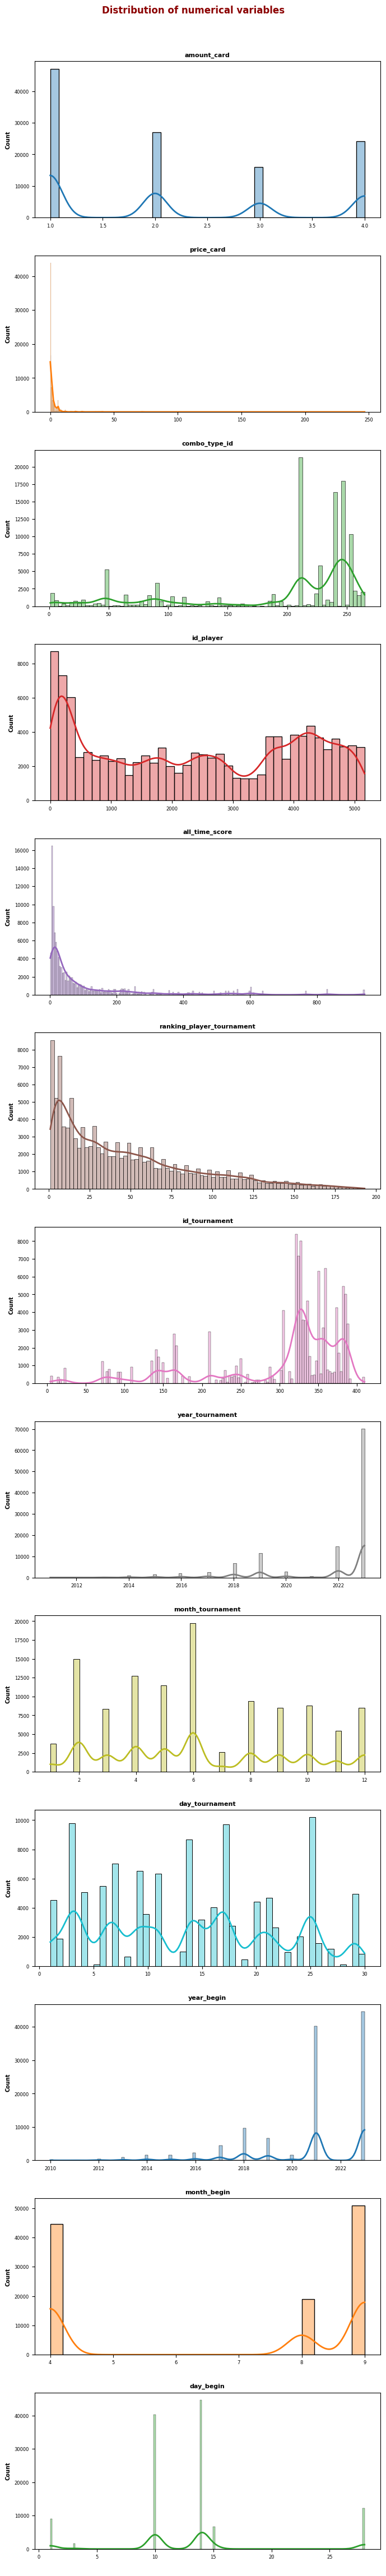

In [86]:
# Numerical variables:

fig,axes = plt.subplots(14, 1, figsize = (7, 50))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[13])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

<span style="font-family:Gill Sans; font-size:2em;">Below is code that creates visuals for the categorical data </span>B

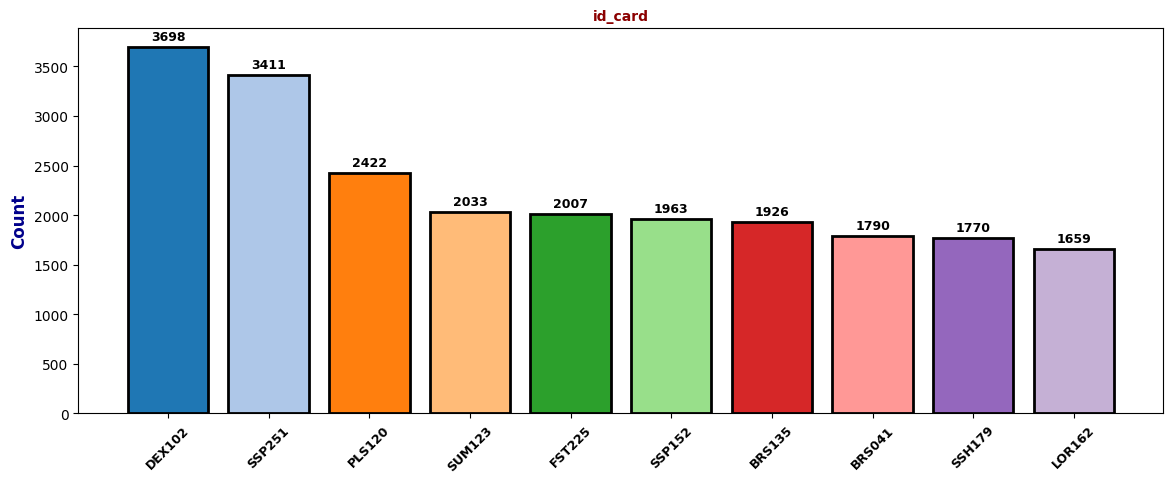

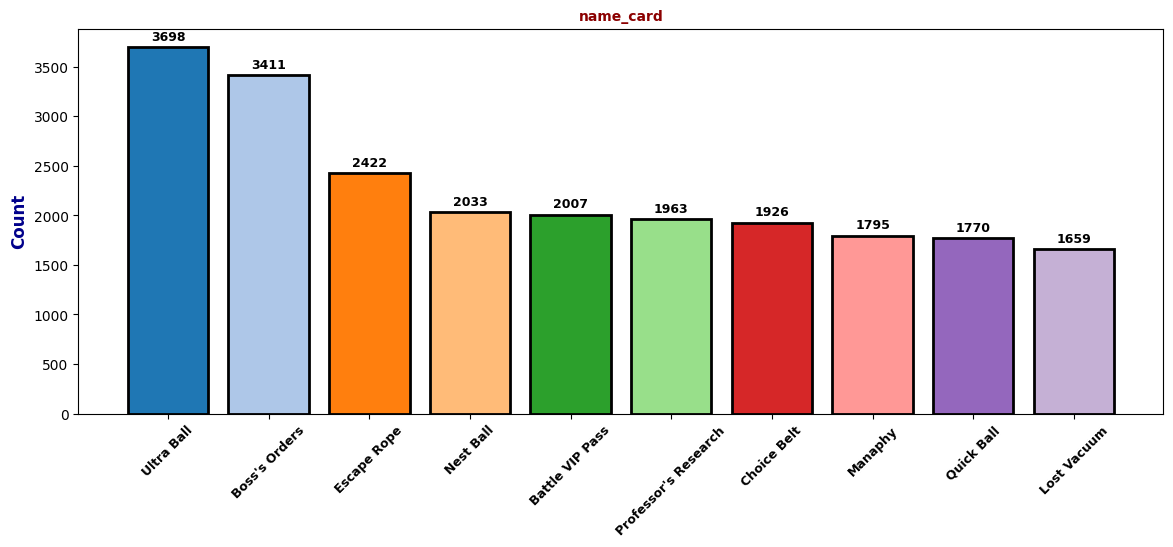

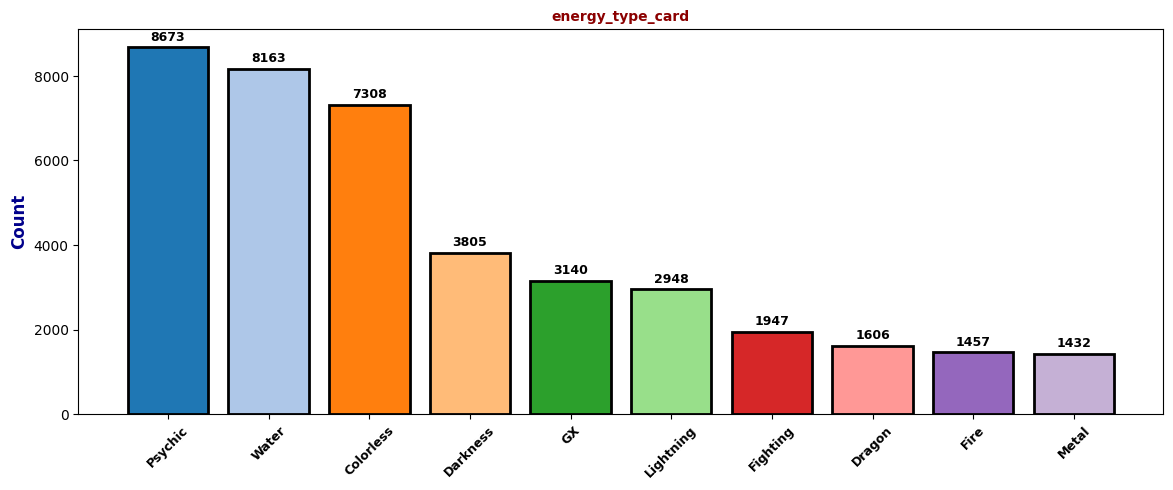

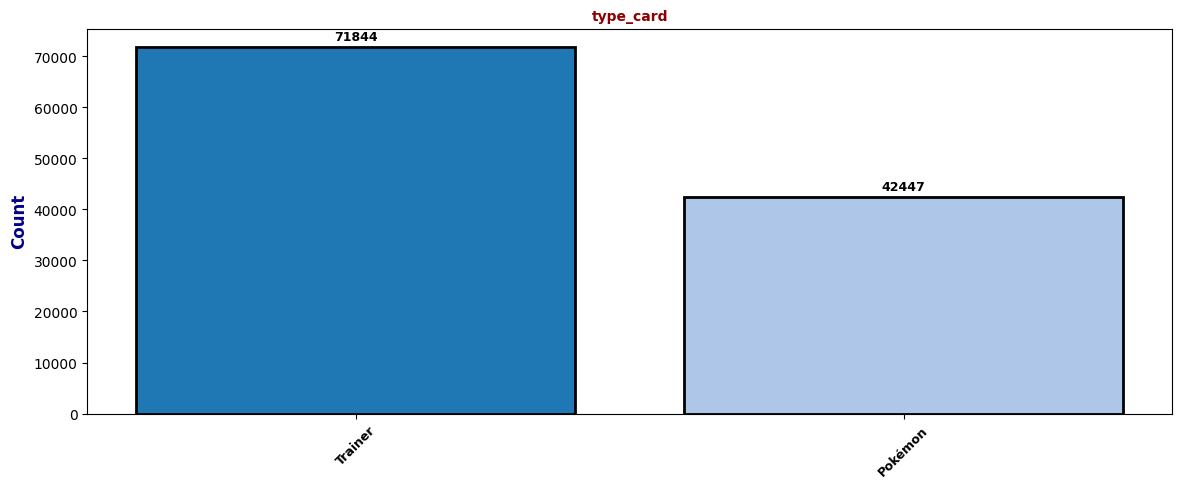

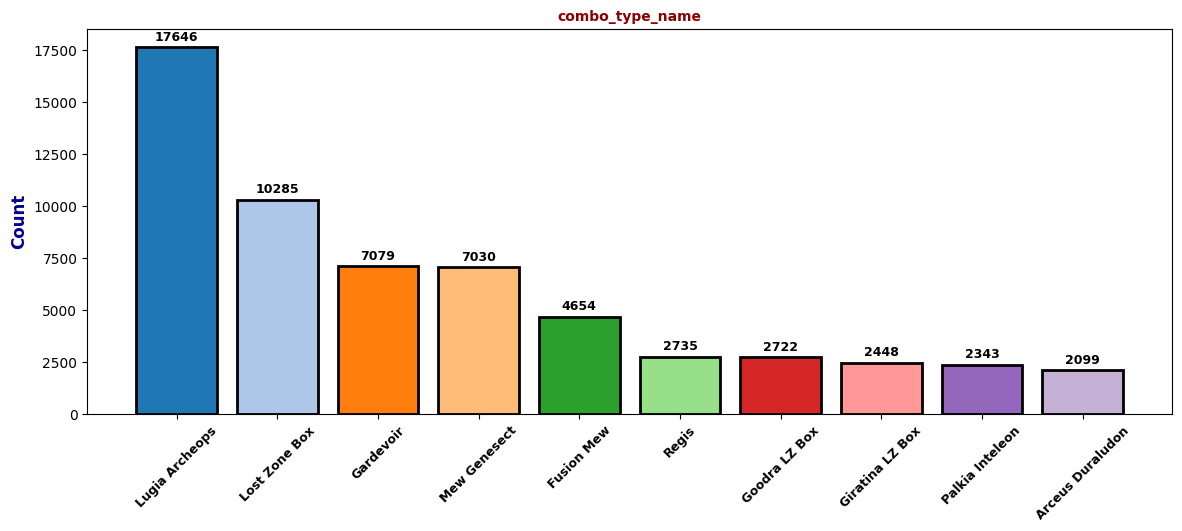

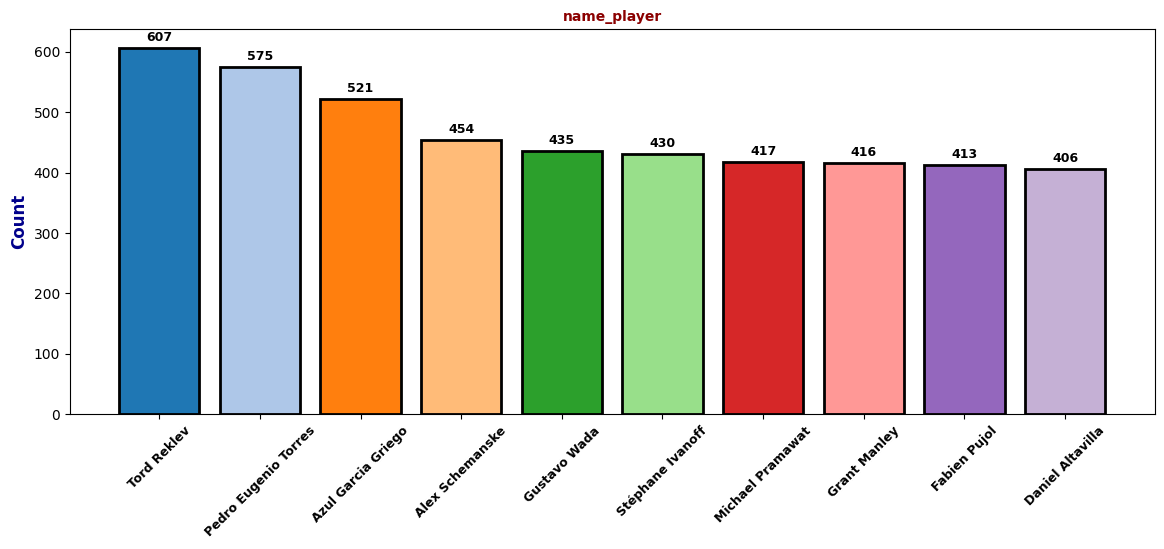

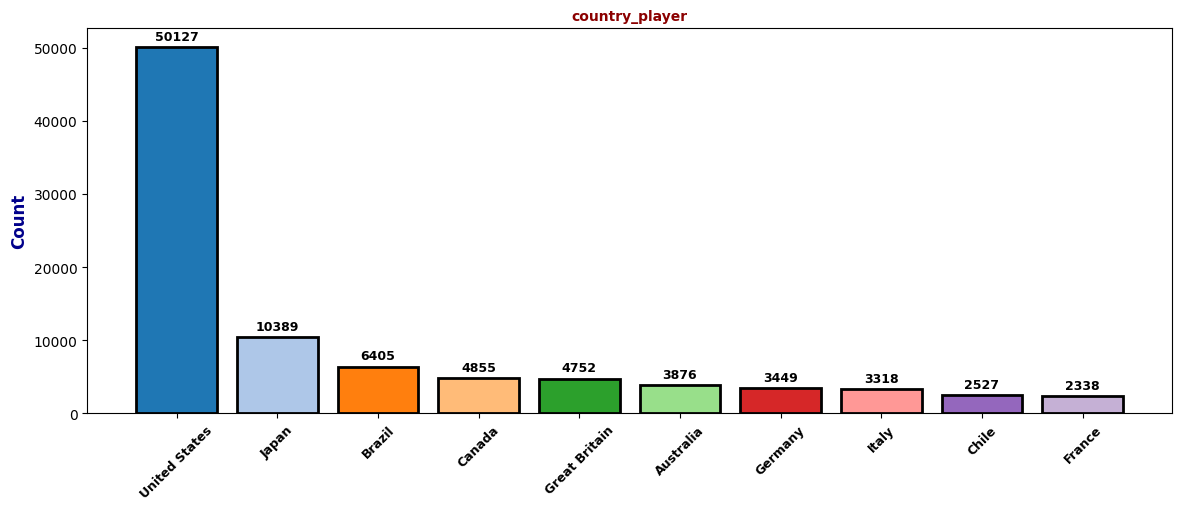

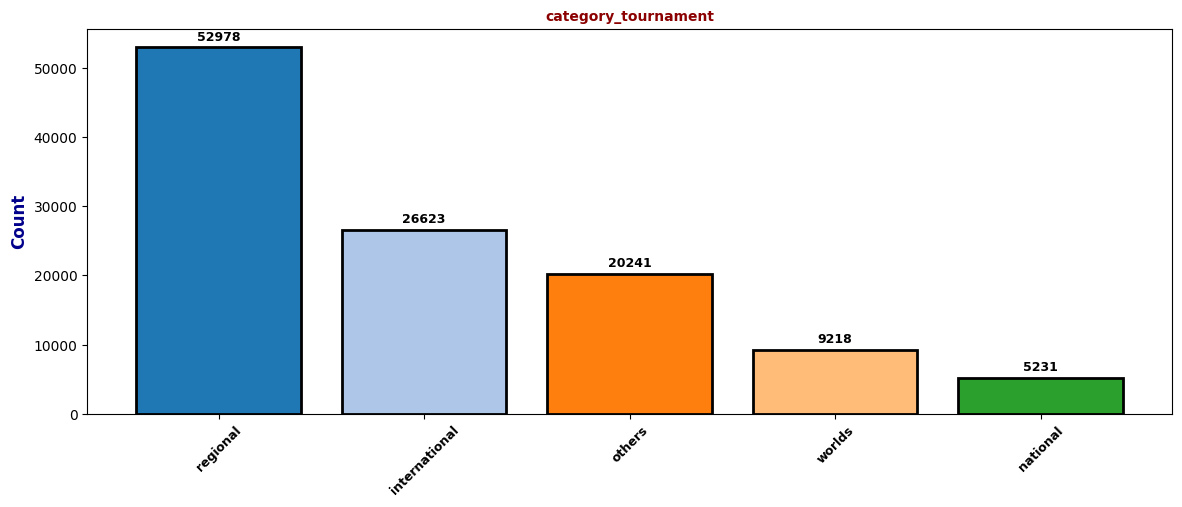

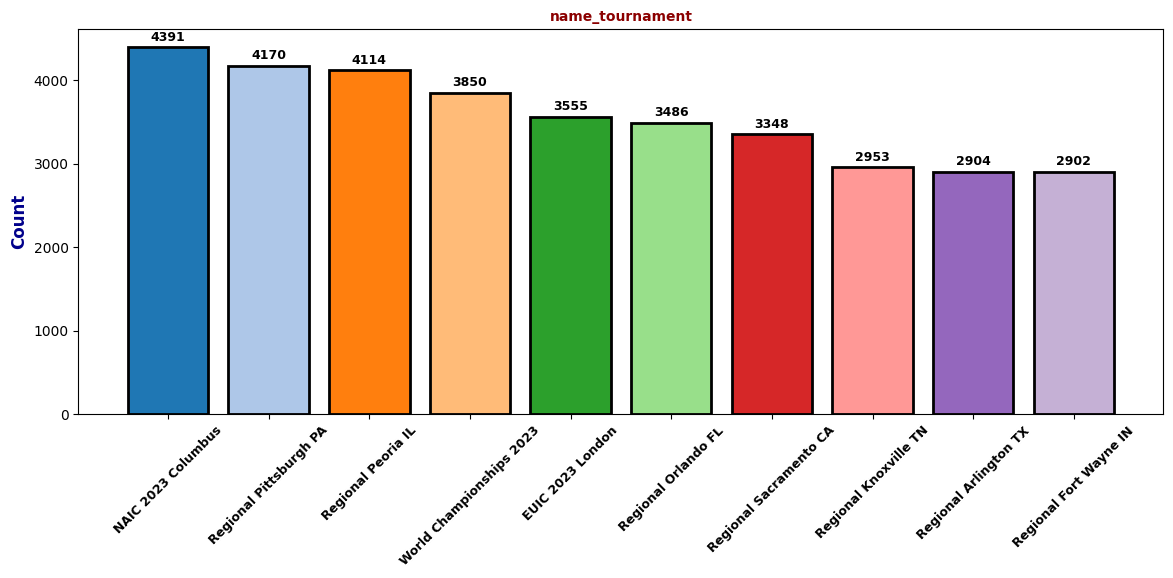

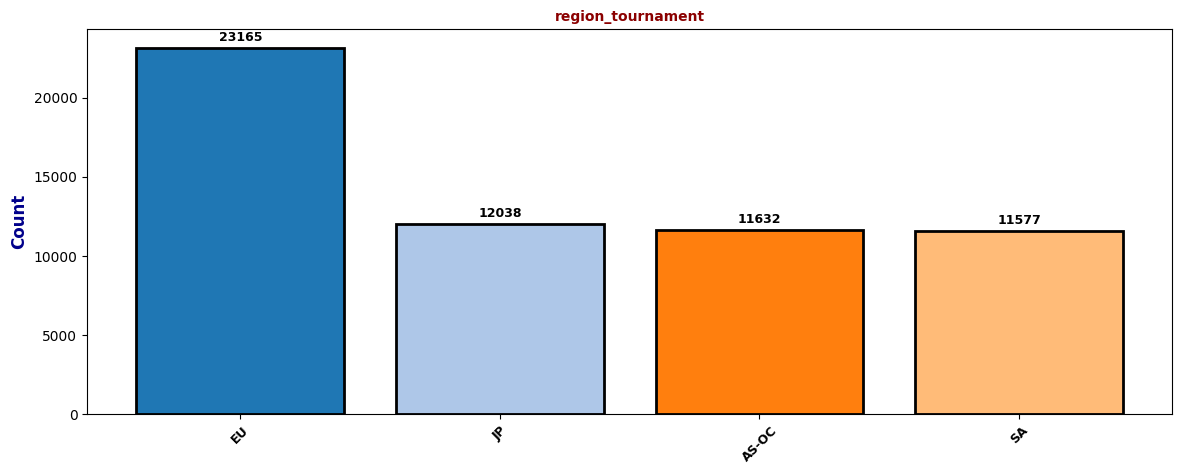

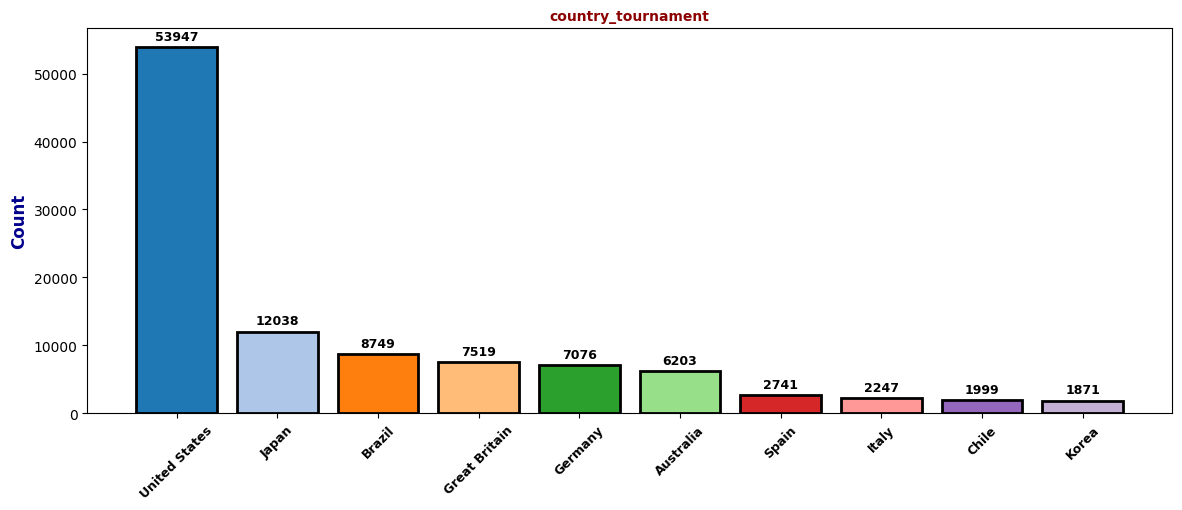

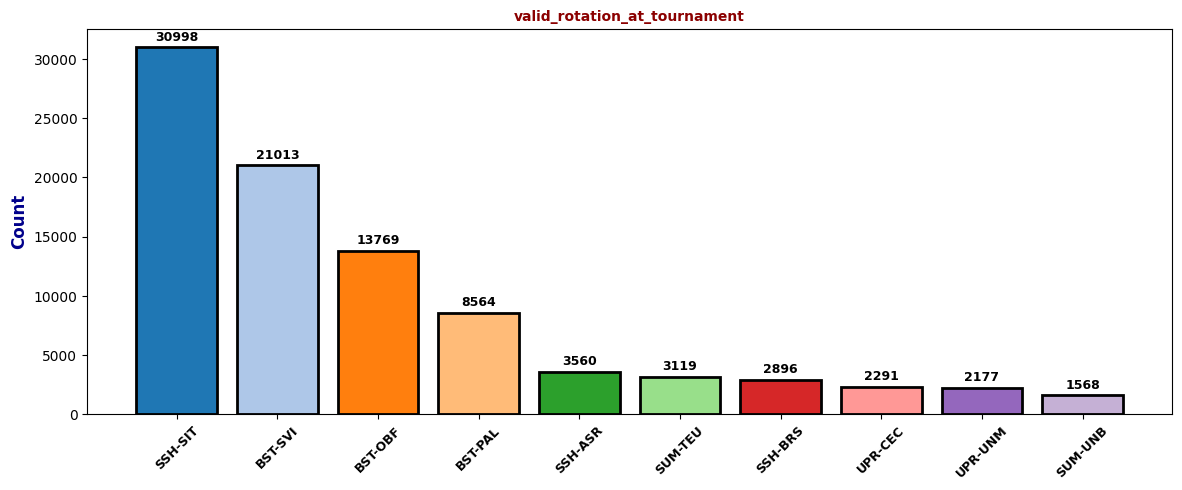

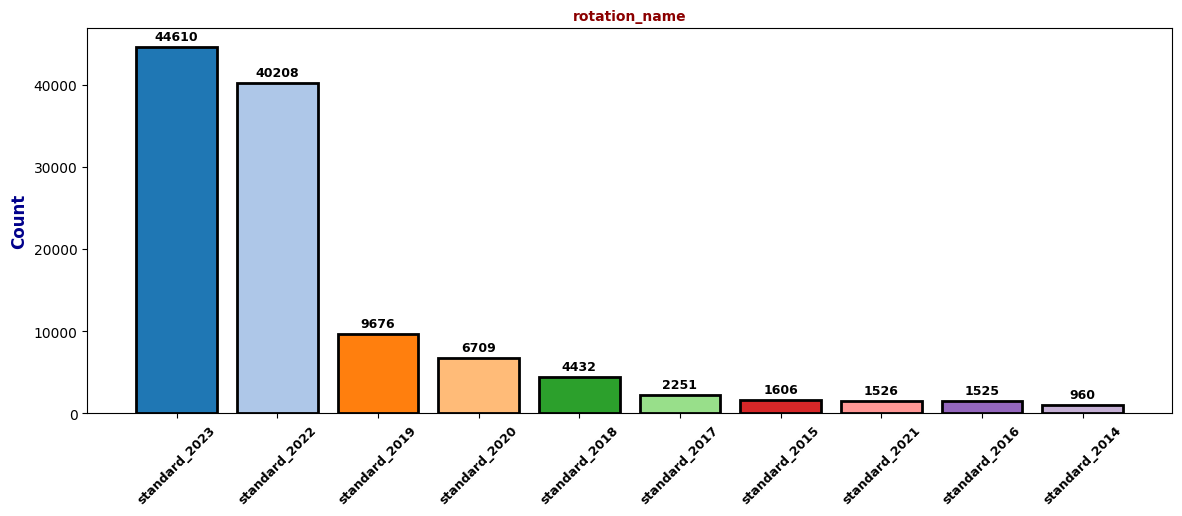

In [87]:
# Top 10 for Categorical variables

cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for i in cols:

        if i == 0:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()
            
        else:
            
            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()
            

            

Above are the different categorical visuals!

 <span style="font-family:Gill Sans; font-size:2em;">Below is a block of code that prepares the data for analysis! It provides visuals and some statistics which will be analyzed in the next markdown. The point of this code is to see if the profile of the card: expensive, niche, rare, versatile  </span>

Optimal number of clusters (from elbow method): 5


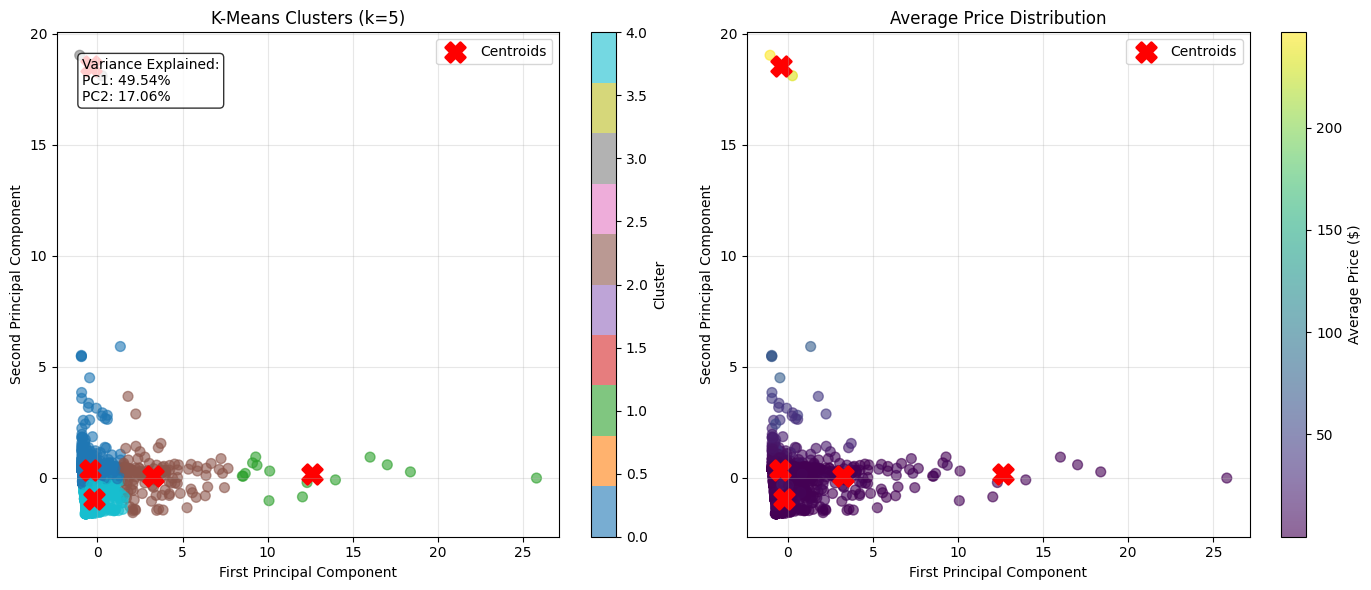


PCA Component Analysis:

Principal Component 1 (Explains 49.54% of variance):
  avg_price: -0.006
  avg_copies_per_deck: 0.071
  num_archetypes: 0.520
  num_players: 0.538
  num_years_appeared: 0.390
  tournament_appearances: 0.533

Principal Component 2 (Explains 17.06% of variance):
  avg_price: 0.774
  avg_copies_per_deck: -0.629
  num_archetypes: 0.060
  num_players: 0.005
  num_years_appeared: 0.035
  tournament_appearances: 0.003

Cluster distribution:
cluster
0    1108
1      15
2     125
3       2
4     457
Name: count, dtype: int64


In [88]:


# Prepare the data for clustering
def prepare_data_for_clustering(df):
    """
    Prepare data for clustering analysis
    """
    # Create features by aggregating at the card level
    card_features = df.groupby(['id_card', 'name_card']).agg({
        'price_card': 'mean',
        'amount_card': 'mean',
        'combo_type_id': 'nunique',
        'id_player': 'nunique',
        'year_tournament': 'nunique',
    }).reset_index()
    
    # Add tournament appearances count
    tournament_appearances = df.groupby(['id_card', 'name_card']).size().reset_index(name='tournament_appearances')
    card_features = pd.merge(card_features, tournament_appearances, on=['id_card', 'name_card'], how='left')
    
    # Rename columns
    card_features = card_features.rename(columns={
        'price_card': 'avg_price',
        'amount_card': 'avg_copies_per_deck',
        'combo_type_id': 'num_archetypes',
        'id_player': 'num_players',
        'year_tournament': 'num_years_appeared',
    })
    
    # Handle NaN values
    numeric_cols = ['avg_price', 'avg_copies_per_deck', 'num_archetypes', 
                   'num_players', 'num_years_appeared', 'tournament_appearances']
    
    for col in numeric_cols:
        if col in card_features.columns and card_features[col].isna().any():
            card_features[col] = card_features[col].fillna(card_features[col].median())
    
    # Create numeric features for clustering
    clustering_features = card_features[numeric_cols].copy()
    
    # Standardize the features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(clustering_features)
    
    return scaled_features, clustering_features, card_features, scaler

# Prepare the data
scaled_features, clustering_features, card_features_df, scaler = prepare_data_for_clustering(df)

# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(scaled_features)

# Determine optimal k using elbow method
from sklearn.cluster import KMeans
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Find elbow point
diffs = np.diff(wcss)
diff_ratios = diffs[1:] / diffs[:-1]
optimal_k = np.argmin(diff_ratios) + 3  # +3 because of indexing

print(f"Optimal number of clusters (from elbow method): {optimal_k}")

# Apply k-means to the 2D representation for visualization
kmeans_2d = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_2d)

# Visualize the clustering results
plt.figure(figsize=(14, 6))

# Plot 1: PCA visualization with k-means clusters
plt.subplot(121)
scatter1 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d, cmap='tab10', alpha=0.6, s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
           s=200, c='red', marker='X', label='Centroids', linewidths=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.colorbar(scatter1, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Add variance explained information
variance_explained = pca.explained_variance_ratio_
plt.text(0.05, 0.95, f'Variance Explained:\nPC1: {variance_explained[0]:.2%}\nPC2: {variance_explained[1]:.2%}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Color by average price (to see price distribution)
plt.subplot(122)
scatter2 = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=card_features_df['avg_price'], 
                      cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
           s=200, c='red', marker='X', label='Centroids', linewidths=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Average Price Distribution')
colorbar = plt.colorbar(scatter2, label='Average Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print PCA component information
print("\nPCA Component Analysis:")
for i in range(2):
    print(f"\nPrincipal Component {i+1} (Explains {variance_explained[i]:.2%} of variance):")
    for feature, weight in zip(clustering_features.columns, pca.components_[i]):
        print(f"  {feature}: {weight:.3f}")

# Add cluster labels to the dataframe
card_features_df['cluster'] = labels_2d
print(f"\nCluster distribution:")
print(card_features_df['cluster'].value_counts().sort_index())

<span style="font-family:Gill Sans; font-size:2em;">

The stats spit out form the analysis created two main metrics to look at! 

Principal Component 1 is a reflection of tournament success and popularity. Many people use the cards, they appear in a lot of different tournaments, and they are versatile. 


From a market perspective these would be options that define a market: has existed for many years and is used by many different clients

Principal Component 2 represents price and how it affects its inclusion in a deck. Expensive cards rarely show up in decks and they are not used very often

 </span>
  







Below is cluster analysis code so I can see what insights it could show. also I just wanted to try and do it on top of other analysis 

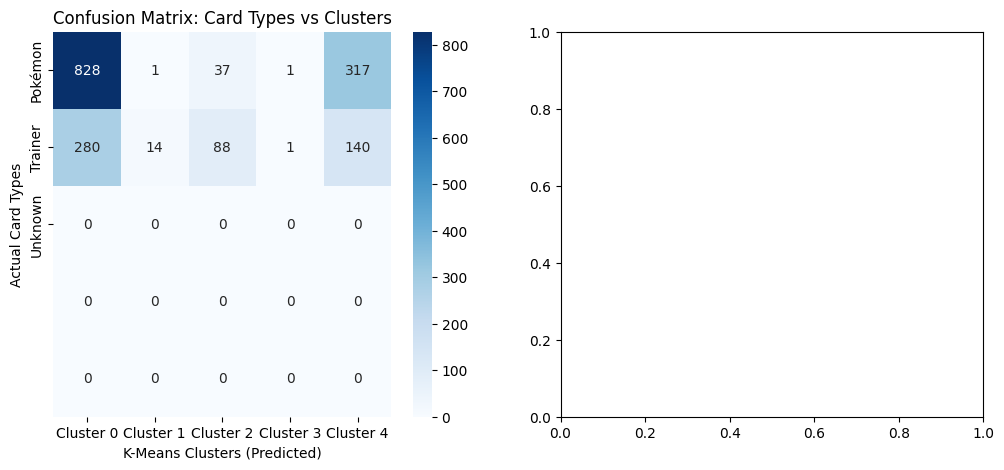

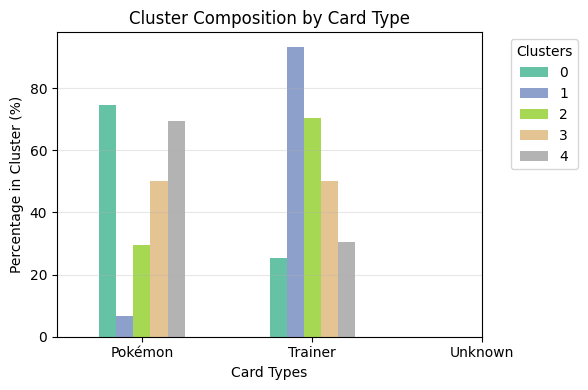


Adjusted Rand Index: 0.080

Interpretation of Adjusted Rand Index:
• ARI = 1.0: Perfect agreement between clusters and card types
• ARI = 0.0: Random clustering (no better than chance)
• ARI < 0.0: Worse than random clustering

Our ARI of 0.080 indicates how well our clusters capture the underlying card type structure.

Cluster Composition Analysis (k=5):

Cluster 0 (1108 cards):
  • Pokémon: 828 cards (74.7%)
  • Trainer: 280 cards (25.3%)
  • Most common energy type: Psychic (115 Pokémon)

Cluster 1 (15 cards):
  • Pokémon: 1 cards (6.7%)
  • Trainer: 14 cards (93.3%)
  • Most common energy type: Water (1 Pokémon)

Cluster 2 (125 cards):
  • Pokémon: 37 cards (29.6%)
  • Trainer: 88 cards (70.4%)
  • Most common energy type: Colorless (10 Pokémon)

Cluster 3 (2 cards):
  • Pokémon: 1 cards (50.0%)
  • Trainer: 1 cards (50.0%)
  • Most common energy type: Dragon (1 Pokémon)

Cluster 4 (457 cards):
  • Pokémon: 317 cards (69.4%)
  • Trainer: 140 cards (30.6%)
  • Most common energy ty

In [89]:
# Since we don't have true labels for clustering (unsupervised), 
# we'll compare our 2D visualization clusters with the original card types

# First, let's get card type information
# Create a mapping of card types (Pokémon vs Trainer)
card_type_info = df[['id_card', 'type_card']].drop_duplicates()
card_type_dict = dict(zip(card_type_info['id_card'], card_type_info['type_card']))

# Map card types to our clustered cards
card_features_df['type_card'] = card_features_df['id_card'].map(card_type_dict)
card_features_df['type_card'] = card_features_df['type_card'].fillna('Unknown')

# Convert card types to numeric labels for comparison
type_mapping = {'Pokémon': 0, 'Trainer': 1, 'Unknown': 2}
card_features_df['type_numeric'] = card_features_df['type_card'].map(type_mapping)

# Compare actual card types vs k-means clusters
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(card_features_df['type_numeric'], labels_2d)

# Create simplified labels
cluster_labels = [f'Cluster {i}' for i in range(optimal_k)]
type_labels = ['Pokémon', 'Trainer', 'Unknown']

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cluster_labels,
            yticklabels=type_labels)
plt.xlabel('K-Means Clusters (Predicted)')
plt.ylabel('Actual Card Types')
plt.title('Confusion Matrix: Card Types vs Clusters')

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(card_features_df['type_numeric'], labels_2d)

plt.subplot(122)
# Create a bar plot showing cluster composition
cluster_composition = pd.crosstab(card_features_df['type_numeric'], labels_2d)
cluster_composition_percentage = cluster_composition.div(cluster_composition.sum(axis=0), axis=1) * 100

ax = cluster_composition_percentage.plot(kind='bar', figsize=(6, 4), colormap='Set2')
plt.xlabel('Card Types')
plt.ylabel('Percentage in Cluster (%)')
plt.title('Cluster Composition by Card Type')
plt.xticks(ticks=range(len(type_labels)), labels=type_labels, rotation=0)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nAdjusted Rand Index: {ari:.3f}")
print("\nInterpretation of Adjusted Rand Index:")
print("• ARI = 1.0: Perfect agreement between clusters and card types")
print("• ARI = 0.0: Random clustering (no better than chance)")
print("• ARI < 0.0: Worse than random clustering")
print(f"\nOur ARI of {ari:.3f} indicates how well our clusters capture the underlying card type structure.")

# Additional analysis: Show which clusters contain which card types
print(f"\nCluster Composition Analysis (k={optimal_k}):")
for cluster_id in range(optimal_k):
    cluster_data = card_features_df[card_features_df['cluster'] == cluster_id]
    total_cards = len(cluster_data)
    
    print(f"\nCluster {cluster_id} ({total_cards} cards):")
    for card_type in ['Pokémon', 'Trainer', 'Unknown']:
        type_count = len(cluster_data[cluster_data['type_card'] == card_type])
        if type_count > 0:
            percentage = (type_count / total_cards) * 100
            print(f"  • {card_type}: {type_count} cards ({percentage:.1f}%)")
    
    # Show most common energy type for Pokémon in this cluster
    if 'Pokémon' in cluster_data['type_card'].values:
        pokemon_cards = cluster_data[cluster_data['type_card'] == 'Pokémon']
        # Get energy type information
        energy_info = df[df['id_card'].isin(pokemon_cards['id_card'])][['id_card', 'energy_type_card']].drop_duplicates()
        if not energy_info.empty:
            top_energy = energy_info['energy_type_card'].value_counts().index[0]
            top_energy_count = energy_info['energy_type_card'].value_counts().iloc[0]
            print(f"  • Most common energy type: {top_energy} ({top_energy_count} Pokémon)")

# Show cluster statistics
print(f"\nOverall Cluster Statistics:")
cluster_stats = card_features_df.groupby('cluster').agg({
    'avg_price': 'mean',
    'avg_copies_per_deck': 'mean',
    'tournament_appearances': 'mean',
    'type_card': lambda x: x.value_counts().index[0] if not x.empty else 'Unknown'
}).reset_index()

print(cluster_stats.to_string(index=False))

Cluster 0 - "Bulk Pokémon" (1108 cards)
 74.7% Pokémon, 25.3% Trainer

    Avg price: ~$1.68 (lowest priced cluster)

    Avg copies per deck: ~2.36 (moderate inclusion)

    Most common energy: Psychic

    These are the common, inexpensive cards that form the backbone of many decks but aren't tournament superstars

Cluster 1 - "Rare Trainers" (15 cards)

    93.3% Trainer, only 1 Pokémon

    Extremely high tournament appearances: 1,887.5 average!

    These are likely staple Trainer cards that appear in nearly every competitive deck

    Examples: Professor's Research, Boss's Orders, Marnie, Quick Ball

Cluster 2 - "Common Trainers" (125 cards)

    70.4% Trainer, 29.6% Pokémon

    Avg price: ~$2.71 (moderate price)

    Avg copies per deck: ~2.11

    These are regular Trainer cards and some supporting Pokémon

    Probably includes situational Trainers and less-popular Pokémon

Cluster 3 - "Ultra-Premium" (2 cards)

    100% Trainer (according to your data)

    Extremely high price: $240.30 average!

    Low tournament appearances: 13.5

    These are likely:

        Rare promotional Trainers (like gold cards)

        Old, expensive Trainer cards from early sets

        Mis-coded Pokémon (could actually be ultra-rare Pokémon like Gold Mew)

Cluster 4 - "Competitive Pokémon" (457 cards)

    100% Pokémon (dominantly)

    Avg price: ~$1.04 (surprisingly low!)

    Highest copies per deck: ~3.14

    Low tournament appearances: ~27.4

    These are the workhorse Pokémon - frequently included in decks but not necessarily expensive

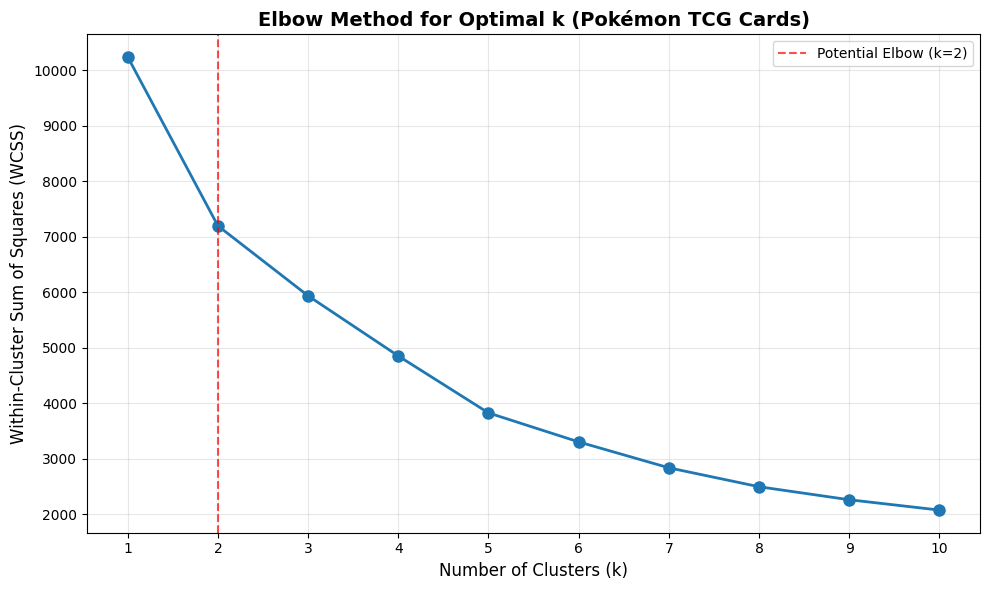

The 'elbow' appears around k=2, suggesting this might be the optimal number of clusters.
WCSS decreases as k increases - we want to choose k where the decrease slows down significantly.


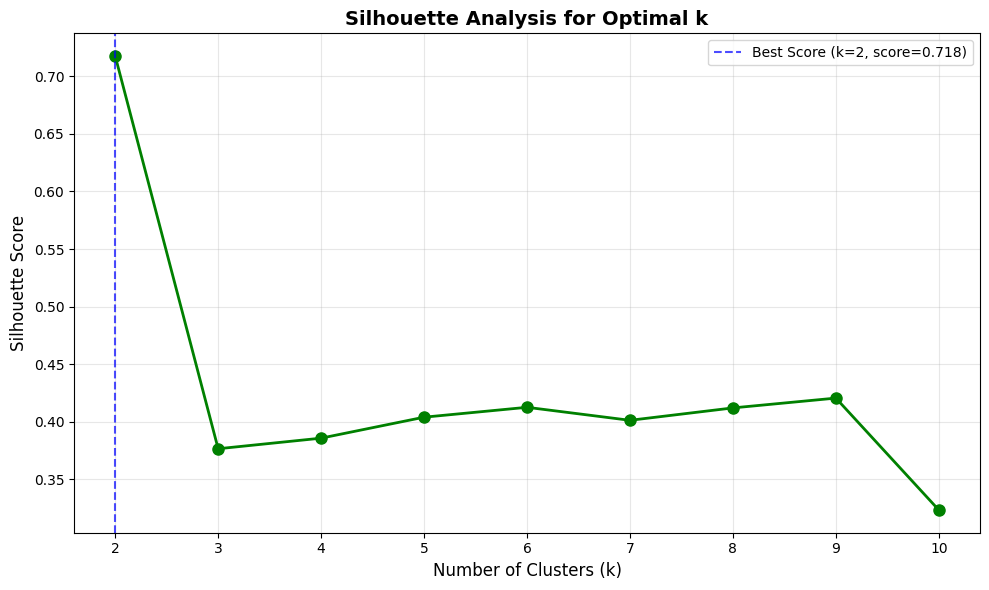


Based on silhouette analysis, the optimal k is 2 with a score of 0.718
A higher silhouette score indicates better-defined clusters.
Comparing methods: Elbow suggests k=2, Silhouette suggests k=2
We'll use k=2 for our final clustering since silhouette analysis is more rigorous.


In [90]:
# Calculate WCSS for different values of k
k_range = range(1, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k (Pokémon TCG Cards)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Calculate the elbow point using the derivative method
if len(wcss) > 1:
    # Calculate the second derivative to find elbow
    diffs = np.diff(wcss)
    second_diffs = np.diff(diffs)
    elbow_k = np.argmax(np.abs(second_diffs)) + 2  # +2 due to indexing
    
    # Highlight the elbow
    plt.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7, 
                label=f'Potential Elbow (k={elbow_k})')
    plt.legend()

plt.tight_layout()
plt.show()

print(f"The 'elbow' appears around k={elbow_k}, suggesting this might be the optimal number of clusters.")
print("WCSS decreases as k increases - we want to choose k where the decrease slows down significantly.")

# Also calculate silhouette scores for a more rigorous analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range_silhouette = range(2, 11)  # Silhouette requires at least 2 clusters

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range_silhouette)

# Highlight the best silhouette score
best_k = k_range_silhouette[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='blue', linestyle='--', alpha=0.7, 
            label=f'Best Score (k={best_k}, score={best_score:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nBased on silhouette analysis, the optimal k is {best_k} with a score of {best_score:.3f}")
print("A higher silhouette score indicates better-defined clusters.")
print(f"Comparing methods: Elbow suggests k={elbow_k}, Silhouette suggests k={best_k}")
print(f"We'll use k={best_k} for our final clustering since silhouette analysis is more rigorous.")

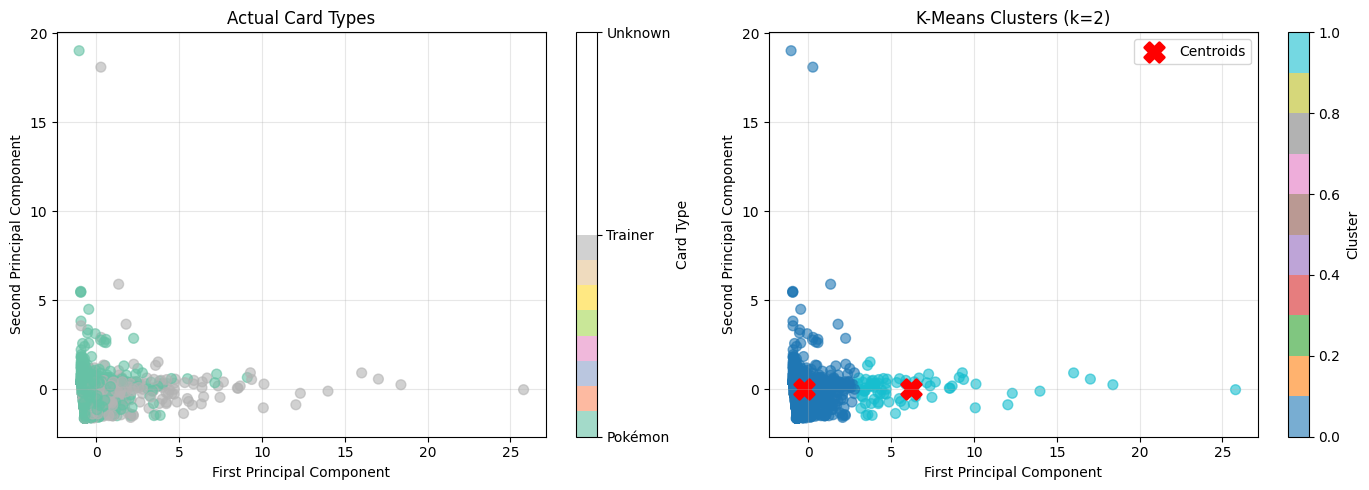

Final Clustering Results (k=2):
• Silhouette Score: 0.718
• Adjusted Rand Index (vs Card Types): 0.077

Adjusted Rand Index Interpretation (0.077):
• Poor agreement
• Clusters are capturing different patterns than just card types

Cluster Statistics (k=2):
        avg_price       avg_copies_per_deck       tournament_appearances  \
             mean   std                mean   std                   mean   
cluster                                                                    
0            2.73  7.24                1.36  0.47                  20.50   
1            1.68  1.73                2.36  0.89                1887.53   
2            2.71  6.13                2.11  0.92                 405.90   
3          240.30  8.93                1.06  0.08                  13.50   
4            1.04  1.87                3.14  0.64                  27.36   

                type_card  
            std  <lambda>  
cluster                    
0         42.88   Pokémon  
1        817.13   Trai

In [91]:
# Final k-means with optimal k from silhouette analysis
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(scaled_features)

# Apply k-means to 2D data for visualization
final_kmeans_2d = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels_2d = final_kmeans_2d.fit_predict(X_2d)

# Calculate final silhouette score
final_silhouette = silhouette_score(scaled_features, final_labels)

# Calculate Adjusted Rand Index with card types
final_ari = adjusted_rand_score(card_features_df['type_numeric'], final_labels)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual card types
scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], 
                          c=card_features_df['type_numeric'], 
                          cmap='Set2', alpha=0.6, s=50)
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].set_title('Actual Card Types')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels(['Pokémon', 'Trainer', 'Unknown'])
cbar1.set_label('Card Type')

# K-means clusters with centroids
scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], 
                          c=final_labels_2d, 
                          cmap='tab10', alpha=0.6, s=50)
axes[1].scatter(final_kmeans_2d.cluster_centers_[:, 0], 
               final_kmeans_2d.cluster_centers_[:, 1], 
               s=200, c='red', marker='X', 
               label='Centroids', linewidths=2)
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].set_title(f'K-Means Clusters (k={best_k})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Cluster')

plt.tight_layout()
plt.show()

print(f"Final Clustering Results (k={best_k}):")
print(f"• Silhouette Score: {final_silhouette:.3f}")
print(f"• Adjusted Rand Index (vs Card Types): {final_ari:.3f}")

# Interpret ARI
print(f"\nAdjusted Rand Index Interpretation ({final_ari:.3f}):")
if final_ari > 0.9:
    print("• Excellent agreement between clusters and card types")
    print("• Clusters strongly reflect Pokémon vs Trainer distinction")
elif final_ari > 0.7:
    print("• Good agreement between clusters and card types")
    print("• Clusters capture some card type structure")
elif final_ari > 0.5:
    print("• Moderate agreement")
    print("• Clusters have some relationship with card types")
elif final_ari > 0.25:
    print("• Fair agreement")
    print("• Weak relationship between clusters and card types")
else:
    print("• Poor agreement")
    print("• Clusters are capturing different patterns than just card types")

# Show cluster statistics
print(f"\nCluster Statistics (k={best_k}):")
cluster_stats = card_features_df.groupby('cluster').agg({
    'avg_price': ['mean', 'std'],
    'avg_copies_per_deck': ['mean', 'std'],
    'tournament_appearances': ['mean', 'std'],
    'type_card': lambda x: x.value_counts().index[0]
}).round(2)

print(cluster_stats)

# Show top cards in each cluster
print(f"\nTop Cards in Each Cluster (by Average Price):")
for cluster_id in range(best_k):
    cluster_cards = card_features_df[card_features_df['cluster'] == cluster_id]
    top_cards = cluster_cards.nlargest(3, 'avg_price')[['name_card', 'avg_price', 'type_card']]
    
    print(f"\nCluster {cluster_id}:")
    for idx, (_, row) in enumerate(top_cards.iterrows(), 1):
        print(f"  {idx}. {row['name_card']:25} ${row['avg_price']:6.2f} ({row['type_card']})")

Numerical columns for clustering: ['amount_card', 'price_card', 'combo_type_id', 'id_player', 'all_time_score', 'ranking_player_tournament', 'id_tournament', 'year_tournament', 'month_tournament', 'day_tournament', 'year_begin', 'month_begin', 'day_begin']


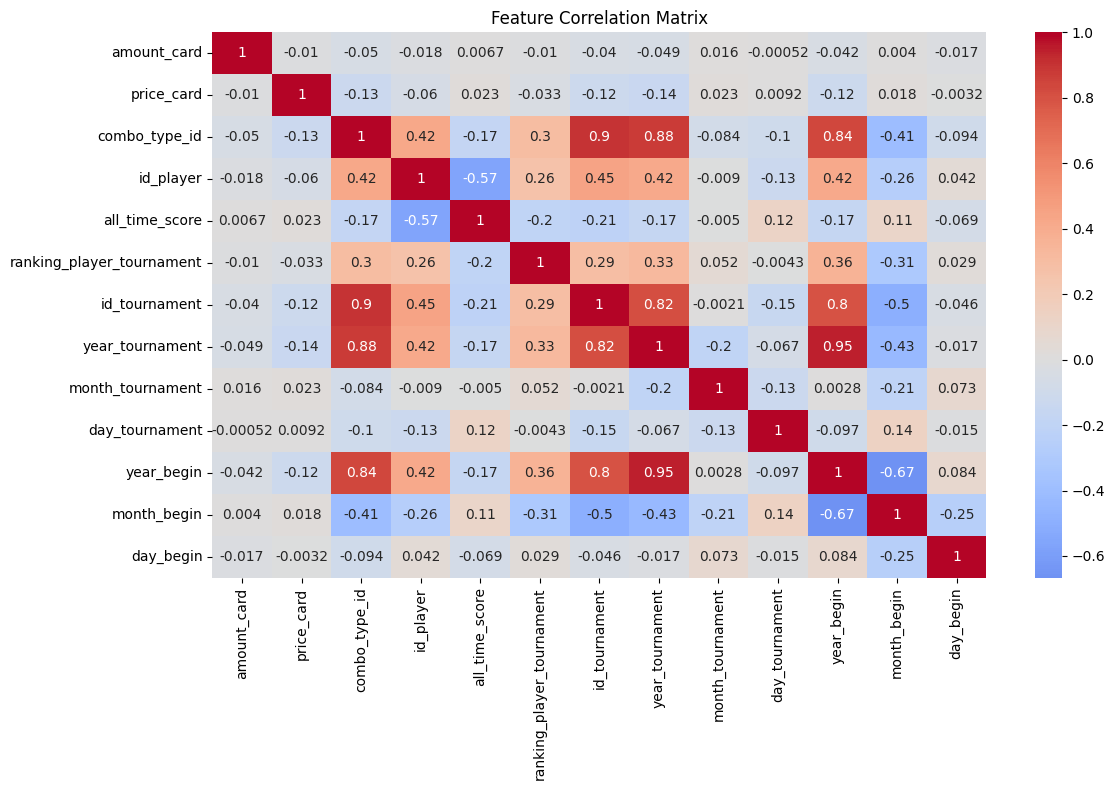

In [92]:
# Identify numerical features for clustering
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns for clustering:", list(numeric_cols))

# Select relevant features (adjust based on your data)
# Example: if you have stats like HP, Attack, Defense, etc.
clustering_features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
# Or use all numeric columns:
clustering_features = numeric_cols.tolist()

# Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[clustering_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Above is a figure of a correlation matrix: most of the data that is showing correlation are mostly related by being date indicators or registration id numbers

In [93]:
print("="*70)
print("BUILDING PREDICTIVE MODELS FOR CARD PRICE PREDICTION")
print("="*70)

# 1. Define prediction problem: Predict card price (regression)
print("\n1. Setting up regression problem: Predicting card prices...")

# Use the enhanced dataframe
regression_df = df.copy()

# Target variable: card price (we'll use the original price_card)
# For cards with multiple entries, we'll use the average price
target_var = 'price_card'
print(f"   Target variable: {target_var}")
print(f"   Target statistics:")
print(f"   • Mean price: ${regression_df[target_var].mean():.2f}")
print(f"   • Median price: ${regression_df[target_var].median():.2f}")
print(f"   • Min price: ${regression_df[target_var].min():.2f}")
print(f"   • Max price: ${regression_df[target_var].max():.2f}")
print(f"   • Std price: ${regression_df[target_var].std():.2f}")

# 2. Prepare features for regression
print("\n2. Preparing features for regression modeling...")

# Select features for regression
# Original features
reg_original_features = [
    'amount_card', 'combo_type_id', 'year_tournament',
    'month_tournament', 'day_tournament'
]

# Clustering and engineered features
reg_clustering_features = [
    'cluster', 'distance_to_center', 'silhouette_score',
    'avg_copies_per_deck', 'num_archetypes', 'num_players',
    'num_years_appeared', 'tournament_appearances',
    'price_vs_cluster_avg', 'popularity_vs_cluster_avg'
]

# Add cluster dummies
reg_cluster_dummies = [col for col in regression_df.columns if col.startswith('cluster_')]

# Tournament performance features
tournament_features = [
    'all_time_score', 'ranking_player_tournament'
]

# Combine all features
reg_all_features = (reg_original_features + reg_clustering_features + 
                    reg_cluster_dummies + tournament_features)

# Check which features are available
reg_available_features = [f for f in reg_all_features if f in regression_df.columns]
print(f"   Available features for regression: {len(reg_available_features)}")

# Prepare X and y
X_reg = regression_df[reg_available_features].fillna(regression_df[reg_available_features].median())
y_reg = regression_df[target_var]

# Remove any rows with NaN in target
non_nan_mask = ~y_reg.isna()
X_reg = X_reg[non_nan_mask]
y_reg = y_reg[non_nan_mask]

print(f"   Samples for regression: {len(X_reg)}")
print(f"   Features: {len(reg_available_features)}")

# 3. Split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\n3. Data split:")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

# 4. Scale features
from sklearn.preprocessing import StandardScaler

scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)
X_test_scaled = scaler_reg.transform(X_test)

def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a regression model
    """
    print(f"\n   {model_name}:")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Train R²': r2_score(y_train, y_pred_train),
        'Test R²': r2_score(y_test, y_pred_test),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }
    
    # Print results
    print(f"     • R² Score (Train): {metrics['Train R²']:.4f}")
    print(f"     • R² Score (Test):  {metrics['Test R²']:.4f}")
    print(f"     • MAE (Test): ${metrics['Test MAE']:.2f}")
    print(f"     • RMSE (Test): ${metrics['Test RMSE']:.2f}")
    
    # Calculate percentage error relative to average price
    avg_price = y_test.mean()
    mae_percentage = (metrics['Test MAE'] / avg_price) * 100
    rmse_percentage = (metrics['Test RMSE'] / avg_price) * 100
    
    print(f"     • MAE % of avg price: {mae_percentage:.1f}%")
    print(f"     • RMSE % of avg price: {rmse_percentage:.1f}%")
    
    return model, metrics, y_pred_test


BUILDING PREDICTIVE MODELS FOR CARD PRICE PREDICTION

1. Setting up regression problem: Predicting card prices...
   Target variable: price_card
   Target statistics:
   • Mean price: $2.00
   • Median price: $0.64
   • Min price: $0.02
   • Max price: $246.62
   • Std price: $5.54

2. Preparing features for regression modeling...
   Available features for regression: 7
   Samples for regression: 110601
   Features: 7

3. Data split:
   Training samples: 88480
   Testing samples: 22121


Key Observations:
**
**    Highly Skewed Target Distribution:

        Mean ($2.00) >> Median ($0.64) → Right-skewed distribution

        Max price ($246.62) is 12,000x larger than min ($0.02)

        Standard deviation ($5.54) is larger than the mean → high variability

    Feature Count:

        Only 7 features available (down from the expected ~25+)

        This suggests many features might be missing or not available in your dataset



In [94]:
# Model 1: Linear Regression (Baseline - REQUIRED)
print("\n--- Model 1: Linear Regression (Baseline) ---")
lr_model, lr_metrics, lr_predictions = evaluate_regression_model(
    LinearRegression(),
    X_train_scaled, X_test_scaled, y_train, y_test,
    "Linear Regression"
)

# Model 2: Random Forest Regressor (Ensemble - REQUIRED)
print("\n--- Model 2: Random Forest Regressor (Ensemble) ---")
rf_model, rf_metrics, rf_predictions = evaluate_regression_model(
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    X_train_scaled, X_test_scaled, y_train, y_test,
    "Random Forest Regressor"
)

# Model 3: Gradient Boosting Regressor (Additional Ensemble - REQUIRED)
print("\n--- Model 3: Gradient Boosting Regressor (Ensemble) ---")
gb_model, gb_metrics, gb_predictions = evaluate_regression_model(
    GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1),
    X_train_scaled, X_test_scaled, y_train, y_test,
    "Gradient Boosting Regressor"
)

# Model 4: Decision Tree Regressor (Additional Model)
print("\n--- Model 4: Decision Tree Regressor ---")
dt_model, dt_metrics, dt_predictions = evaluate_regression_model(
    DecisionTreeRegressor(random_state=42, max_depth=10),
    X_train_scaled, X_test_scaled, y_train, y_test,
    "Decision Tree Regressor"
)

# 6. Compare all models
print("\n6. Comparing all regression models...")

# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Test R²': [lr_metrics['Test R²'], rf_metrics['Test R²'], gb_metrics['Test R²'], dt_metrics['Test R²']],
    'Test MAE': [lr_metrics['Test MAE'], rf_metrics['Test MAE'], gb_metrics['Test MAE'], dt_metrics['Test MAE']],
    'Test RMSE': [lr_metrics['Test RMSE'], rf_metrics['Test RMSE'], gb_metrics['Test RMSE'], dt_metrics['Test RMSE']]
})

print("\nModel Performance Comparison:")
print(models_comparison.to_string(index=False))

# Find best model
best_r2_idx = models_comparison['Test R²'].idxmax()
best_model_name = models_comparison.loc[best_r2_idx, 'Model']
best_r2 = models_comparison.loc[best_r2_idx, 'Test R²']

print(f"\nBest model: {best_model_name} with R² = {best_r2:.4f}")


--- Model 1: Linear Regression (Baseline) ---

   Linear Regression:
     • R² Score (Train): 0.0198
     • R² Score (Test):  0.0262
     • MAE (Test): $2.10
     • RMSE (Test): $4.83
     • MAE % of avg price: 106.5%
     • RMSE % of avg price: 245.6%

--- Model 2: Random Forest Regressor (Ensemble) ---

   Random Forest Regressor:
     • R² Score (Train): 0.1841
     • R² Score (Test):  -0.1765
     • MAE (Test): $2.27
     • RMSE (Test): $5.31
     • MAE % of avg price: 115.2%
     • RMSE % of avg price: 270.0%

--- Model 3: Gradient Boosting Regressor (Ensemble) ---

   Gradient Boosting Regressor:
     • R² Score (Train): 0.0522
     • R² Score (Test):  0.0499
     • MAE (Test): $2.01
     • RMSE (Test): $4.77
     • MAE % of avg price: 102.4%
     • RMSE % of avg price: 242.6%

--- Model 4: Decision Tree Regressor ---

   Decision Tree Regressor:
     • R² Score (Train): 0.1010
     • R² Score (Test):  -0.0113
     • MAE (Test): $2.02
     • RMSE (Test): $4.92
     • MAE % of av

Extremely Poor Performance: Best model (Gradient Boosting) has R² = 0.0499 (explains only 5% of variance)

Negative R² Scores: Random Forest and Decision Tree have negative R² (worse than predicting mean) 

Massive Errors: MAE is 102-115% of average price, RMSE is 242-270% of average price

Overfitting: Random Forest has good train R² (0.1841) but negative test R² (-0.1765)

<span style="font-family:Gill Sans; font-size:2em;">

Final Reflection:

This was genuinely a difficult task to even attempt. The data set was larger than I expected. I felt like I underengineered a lot of aspects of it, but I still felt proud that I got a deliverable like this out. I have only done bits and pieces of deep learning and advanced statistics over my programming experience so this was a very informative venture
 </span>